In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [4]:
test_df


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [6]:
train_df.describe()
test_df .describe()


,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


In [7]:
train_df.head()
test_df.head()
train_df.tail()
test_df.tail()
train_df.dtypes
test_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

<Axes: >

<Figure size 2000x800 with 0 Axes>

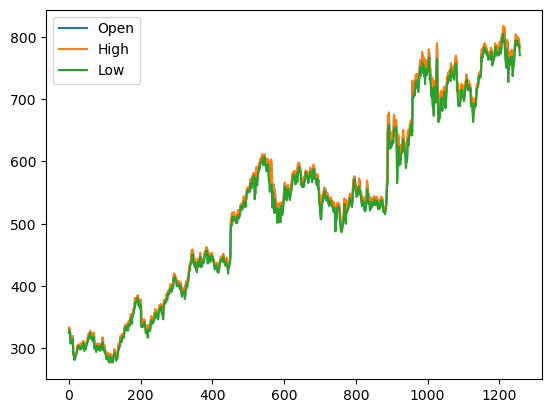

In [9]:
plt.figure(figsize=(20,8))
train_df.plot()

<Axes: >

<Figure size 2000x800 with 0 Axes>

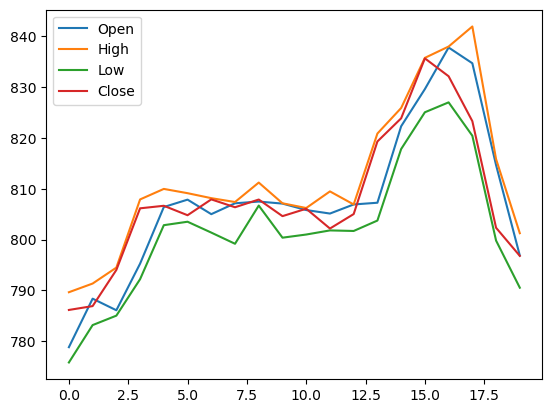

In [10]:
plt.figure(figsize=(20,8))
test_df.plot()

In [11]:
train_df['Date'].value_counts()

Date
1/3/2012      1
4/30/2015     1
5/11/2015     1
5/8/2015      1
5/7/2015      1
             ..
9/4/2013      1
9/3/2013      1
8/30/2013     1
8/29/2013     1
12/30/2016    1
Name: count, Length: 1258, dtype: int64

In [14]:
train_df['Date']=pd.to_datetime(train_df['Date'])

In [15]:
test_df['Date']=pd.to_datetime(test_df['Date'])

In [16]:
train_df['Date']
test_df['Date']

0    2017-01-03
1    2017-01-04
2    2017-01-05
3    2017-01-06
4    2017-01-09
5    2017-01-10
6    2017-01-11
7    2017-01-12
8    2017-01-13
9    2017-01-17
10   2017-01-18
11   2017-01-19
12   2017-01-20
13   2017-01-23
14   2017-01-24
15   2017-01-25
16   2017-01-26
17   2017-01-27
18   2017-01-30
19   2017-01-31
Name: Date, dtype: datetime64[ns]

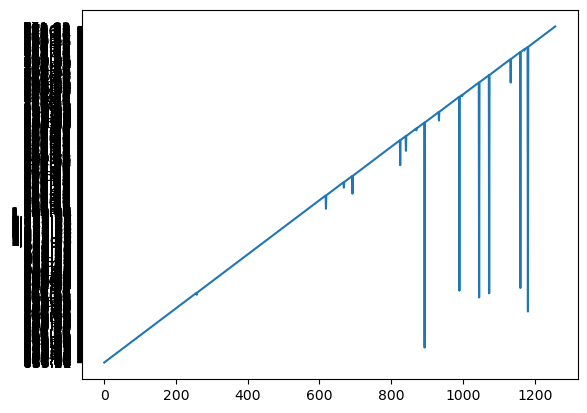

In [17]:
plt.plot(train_df['Close'])


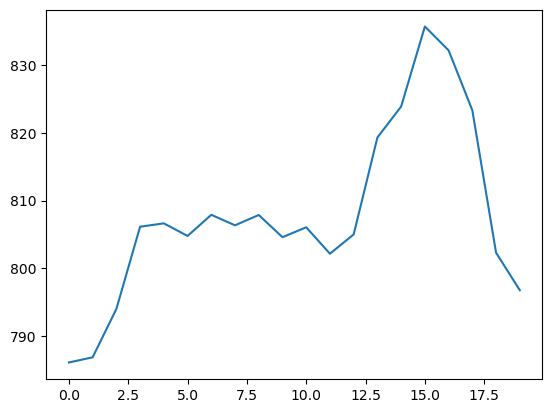

In [18]:
plt.plot(test_df['Close'])


<Axes: >

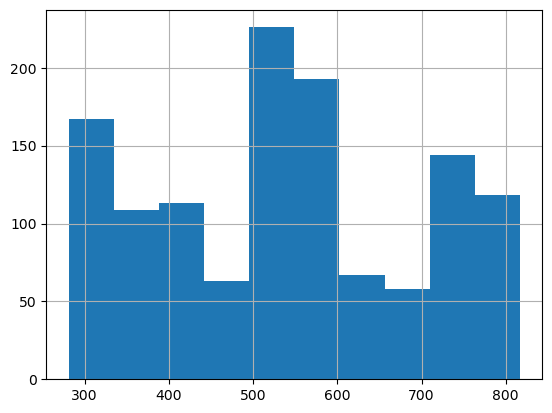

In [20]:
train_df['High'].hist()

<Axes: >

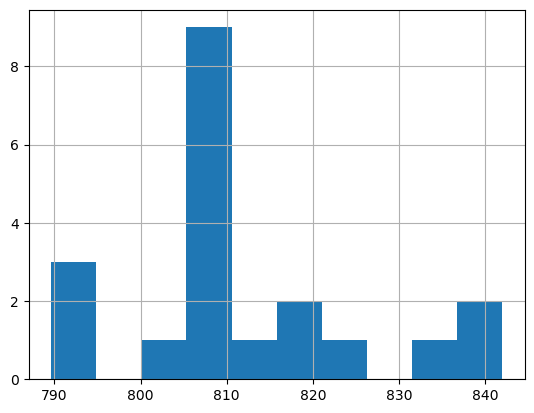

In [21]:
test_df['High'].hist()